In [1]:
# pip install -r requirements.txt
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

/Users/charlotteverity/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
streaming_pre = './streaming_history_files'
streaming_paths = os.listdir(streaming_pre)
audio_paths = [x for x in streaming_paths if "Audio" in x]
audio_2025_paths = [x for x in audio_paths if "2025" in x]
audio_2025_paths

['Streaming_History_Audio_2025_13.json',
 'Streaming_History_Audio_2024-2025_12.json',
 'Streaming_History_Audio_2025_14.json']

## Helper Funcs

In [3]:
# Takes in list of data file paths of streaming data jsons and date limits
def load_streaming_files(paths, min_date = None, max_date = None):
  streaming_data = pd.DataFrame()
  for p in sorted(paths):
    df_temp = pd.read_json(streaming_pre+"/"+p)
    df_temp["stream_date"] = pd.to_datetime(df_temp["ts"]).dt.date
    df_temp["ts"] = pd.to_datetime(df_temp["ts"])
    streaming_data = pd.concat([streaming_data, df_temp])
  if(min_date is not None):
    streaming_data = streaming_data[(streaming_data["stream_date"]>=pd.to_datetime(min_date).date())]
  if(max_date is not None):
    streaming_data = streaming_data[(streaming_data["stream_date"]<=pd.to_datetime(max_date).date())]
  streaming_data = streaming_data[~streaming_data["master_metadata_track_name"].isna()]
  return streaming_data

# Keep necessary, non-PI columns
def clean_streaming_data(streaming_data):
  streaming_data = streaming_data[['platform', 'ms_played', 'master_metadata_track_name', 'master_metadata_album_artist_name', 
                               'master_metadata_album_album_name', 'spotify_track_uri', 'reason_start', 'reason_end', 
                               'skipped', 'stream_date', 'ts']].copy()
  streaming_data["seconds"] = streaming_data["ms_played"]/1000
  streaming_data["minutes"] = streaming_data["seconds"]/60
  return streaming_data

def get_summary_stats(streaming_data):
  minutes_played = streaming_data["minutes"].sum()
  songs_played = streaming_data["spotify_track_uri"].count()
  unique_songs_played = streaming_data.groupby(["master_metadata_track_name", "master_metadata_album_artist_name"]).ngroups
  artists_played = streaming_data["master_metadata_album_artist_name"].nunique()
  print("Total minutes played: "+str(minutes_played))
  print("Total songs played: "+str(songs_played))
  print("Unique songs played: "+str(unique_songs_played))
  print("Unique artists played: "+str(artists_played))

def get_most_played_songs(streaming_data):
  most_played_songs = streaming_data.groupby(["master_metadata_track_name", "master_metadata_album_artist_name"])["master_metadata_track_name"]\
                                    .count().reset_index(name="plays").sort_values("plays", ascending=False)
  print("Most played songs: ")
  display(most_played_songs.head(5))
  return most_played_songs

def get_longest_played_songs(streaming_data):
  longest_played_songs = streaming_data.groupby(["master_metadata_track_name", "master_metadata_album_artist_name"])["minutes"]\
                         .sum().reset_index(name="minutes").sort_values("minutes", ascending=False)
  print("Longest played songs: ")
  display(longest_played_songs.head(5))
  return longest_played_songs

def get_most_played_artists(streaming_data):
  most_played_artists = streaming_data.groupby(["master_metadata_album_artist_name"])["master_metadata_track_name"]\
                         .count().reset_index(name="plays").sort_values("plays", ascending=False)
  print("Most played artists: ")
  display(most_played_artists.head(5))
  return most_played_artists

def get_longest_played_artists(streaming_data):
  longest_played_artists = streaming_data.groupby(["master_metadata_album_artist_name"])["minutes"]\
                          .sum().reset_index(name="minutes").sort_values("minutes", ascending=False)
  print("Longest played artists: ")
  display(longest_played_artists.head(5))
  return longest_played_artists

  


## 2025 Streams

In [4]:
audio_2025_df = load_streaming_files(audio_2025_paths, "2025-01-01", "2025-12-31")
audio_2025_df = clean_streaming_data(audio_2025_df)
print(audio_2025_df["stream_date"].min())
print(audio_2025_df["stream_date"].max())
print(audio_2025_df.shape)

2025-01-01
2025-10-09
(22921, 13)


In [5]:
get_summary_stats(audio_2025_df)

Total minutes played: 38921.6226
Total songs played: 22921
Unique songs played: 5178
Unique artists played: 1799


In [6]:
most_played_songs_2025 = get_most_played_songs(audio_2025_df)
longest_played_songs_2025 = get_longest_played_songs(audio_2025_df)
most_played_artists_2025 = get_most_played_artists(audio_2025_df)
longest_played_artists_2025 = get_longest_played_artists(audio_2025_df)

Most played songs: 


,master_metadata_track_name,master_metadata_album_artist_name,plays
2858,Nettles,Ethel Cain,104
2108,Illegal,PinkPantheress,89
4322,Tonight,PinkPantheress,86
4152,The Edge,Sydney Ross Mitchell,81
5050,party 4 u,Charli xcx,79


Longest played songs: 


,master_metadata_track_name,master_metadata_album_artist_name,minutes
2858,Nettles,Ethel Cain,698.383150
1528,Fuck Me Eyes,Ethel Cain,351.318450
4152,The Edge,Sydney Ross Mitchell,251.258967
5050,party 4 u,Charli xcx,245.392267
3974,Sunshine Baby,The Japanese House,204.949717


Most played artists: 


,master_metadata_album_artist_name,plays
303,Charli xcx,728
1720,Zara Larsson,641
516,Ethel Cain,586
334,Clairo,584
1247,PinkPantheress,544


Longest played artists: 


,master_metadata_album_artist_name,minutes
516,Ethel Cain,2103.026683
303,Charli xcx,1342.694650
334,Clairo,1245.126350
1720,Zara Larsson,1208.443650
1543,The Marías,1066.552733


## All-Time Streaming

In [7]:
audio_all_df = load_streaming_files(audio_paths)
audio_all_df = clean_streaming_data(audio_all_df)
print(audio_all_df["stream_date"].min())
print(audio_all_df["stream_date"].max())
print(audio_all_df.shape)

2016-06-21
2025-10-09
(222973, 13)


In [27]:
get_summary_stats(audio_all_df)

Total minutes played: 504202.11029999994
Total songs played: 222973
Unique songs played: 23050
Unique artists played: 6482


In [8]:
most_played_songs = get_most_played_songs(audio_all_df)
longest_played_songs = get_longest_played_songs(audio_all_df)
most_played_artists = get_most_played_artists(audio_all_df)
longest_played_artists = get_longest_played_artists(audio_all_df)

Most played songs: 


,master_metadata_track_name,master_metadata_album_artist_name,plays
16266,Say It,Maggie Rogers,530
714,Alaska,Maggie Rogers,527
11510,Love You For A Long Time,Maggie Rogers,496
13669,Ode to a Conversation Stuck in Your Throat,Del Water Gap,466
1047,American Teenager,Ethel Cain,443


Longest played songs: 


,master_metadata_track_name,master_metadata_album_artist_name,minutes
16266,Say It,Maggie Rogers,1581.138767
5271,Dreams - 2004 Remaster,Fleetwood Mac,1348.760500
11510,Love You For A Long Time,Maggie Rogers,1335.833717
2900,Butterflies,Kacey Musgraves,1268.451867
10221,Kill The Lights (with Nile Rodgers) - Audien R...,Alex Newell,1174.764917


Most played artists: 


,master_metadata_album_artist_name,plays
376,Ariana Grande,6638
3611,Maggie Rogers,5389
3200,Lana Del Rey,4450
2368,Hozier,4053
2916,Kacey Musgraves,3910


Longest played artists: 


,master_metadata_album_artist_name,minutes
376,Ariana Grande,16299.868017
3611,Maggie Rogers,15136.073567
3200,Lana Del Rey,13000.098050
1790,Ethel Cain,11871.254400
2368,Hozier,10525.943483


## Trends

In [9]:
audio_monthly = audio_all_df[audio_all_df["stream_date"]<pd.to_datetime("2025-10-01").date()]
audio_monthly = audio_monthly[audio_monthly["stream_date"]>=pd.to_datetime("2016-7-01").date()]

Month with Most Streaming Minutes: 
Oct-2020
7492.34425


ts
May-2025    5249.316250
Jun-2025    5264.404350
Jul-2025    3057.338367
Aug-2025    3853.571717
Sep-2025    3132.719367
Name: minutes, dtype: float64

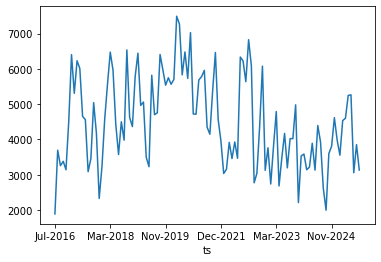

In [10]:
monthly_sum = audio_monthly.groupby(pd.to_datetime(audio_monthly['ts']).dt.strftime('%b-%Y'), sort=False)['minutes'].sum()
print("Month with Most Streaming Minutes: ")
print((monthly_sum).idxmax())
print(max(monthly_sum))
display(monthly_sum[-5:])
monthly_sum.plot()

## 3D Scatterplot

In [ ]:
play_count = audio_all_df.groupby(["master_metadata_track_name", "master_metadata_album_artist_name"])["master_metadata_track_name"]\
                      .count().reset_index(name="plays").sort_values("plays", ascending=False)
play_time = audio_all_df.groupby(["master_metadata_track_name", "master_metadata_album_artist_name"])["minutes"]\
                         .sum().reset_index(name="minutes").sort_values("minutes", ascending=False)
songs = audio_all_df[["master_metadata_track_name", "master_metadata_album_artist_name"]].drop_duplicates()

In [33]:
song_plays = songs.merge(play_count, on=["master_metadata_track_name", "master_metadata_album_artist_name"], how="left")\
                  .merge(play_time, on=["master_metadata_track_name", "master_metadata_album_artist_name"], how="left")
song_plays.sample(5)

,master_metadata_track_name,master_metadata_album_artist_name,plays,minutes
3254,Mean What I Mean,AlunaGeorge,4,11.235433
17791,One That Got Away,MUNA,4,0.065233
18864,Grapevines,Jade LeMac,1,0.017417
9563,Superposition,Young the Giant,7,25.237917
13657,Moth To A Flame (with The Weeknd),Swedish House Mafia,3,11.745833
